# Load the Dataset

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\kiran\\Desktop\\infosys Intern\\final_adjusted_crowd_dataset.csv")

# Display first few rows to understand the structure
data.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# Define Sensor Columns and Calculate IQR

In [2]:
# Define the sensor columns
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Dictionary to store IQR, Q1, and Q3 for each sensor
iqr_info = {}

for col in sensor_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    
# Display IQR, Q1, and Q3 values for each sensor
print("IQR, Q1, and Q3 values for each sensor:\n", iqr_info)


IQR, Q1, and Q3 values for each sensor:
 {'Acc X': {'Q1': -0.37937883, 'Q3': 0.3624705, 'IQR': 0.74184933}, 'Acc Y': {'Q1': -0.12676811, 'Q3': 0.47869587, 'IQR': 0.60546398}, 'Acc Z': {'Q1': -0.7013532, 'Q3': 0.67468005, 'IQR': 1.3760332499999999}, 'gyro_x': {'Q1': -0.046690468, 'Q3': 0.04493932, 'IQR': 0.09162978799999999}, 'gyro_y': {'Q1': -0.033271793, 'Q3': 0.021706078, 'IQR': 0.054977871}, 'gyro_z': {'Q1': -0.027224237, 'Q3': 0.024088446, 'IQR': 0.051312683}}


# Detect Outliers and Flag Them

In [3]:
# Create a DataFrame to store outlier flags for each sensor
outliers = pd.DataFrame(index=data.index)

for col in sensor_columns:
    Q1 = iqr_info[col]['Q1']
    Q3 = iqr_info[col]['Q3']
    IQR = iqr_info[col]['IQR']
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag as outlier (1) if value is outside bounds, otherwise 0
    outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)

# Display the first few rows of the outliers DataFrame
outliers.head()


,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Summarize Outlier Counts for Each Sensor

In [6]:
# Count total outliers for each sensor
outlier_counts = outliers.sum()
print("Number of outliers detected for each sensor:\n", outlier_counts)

Number of outliers detected for each sensor:
 Acc X     1669
Acc Y     1633
Acc Z     1333
gyro_x    1804
gyro_y    1823
gyro_z    1482
dtype: int64


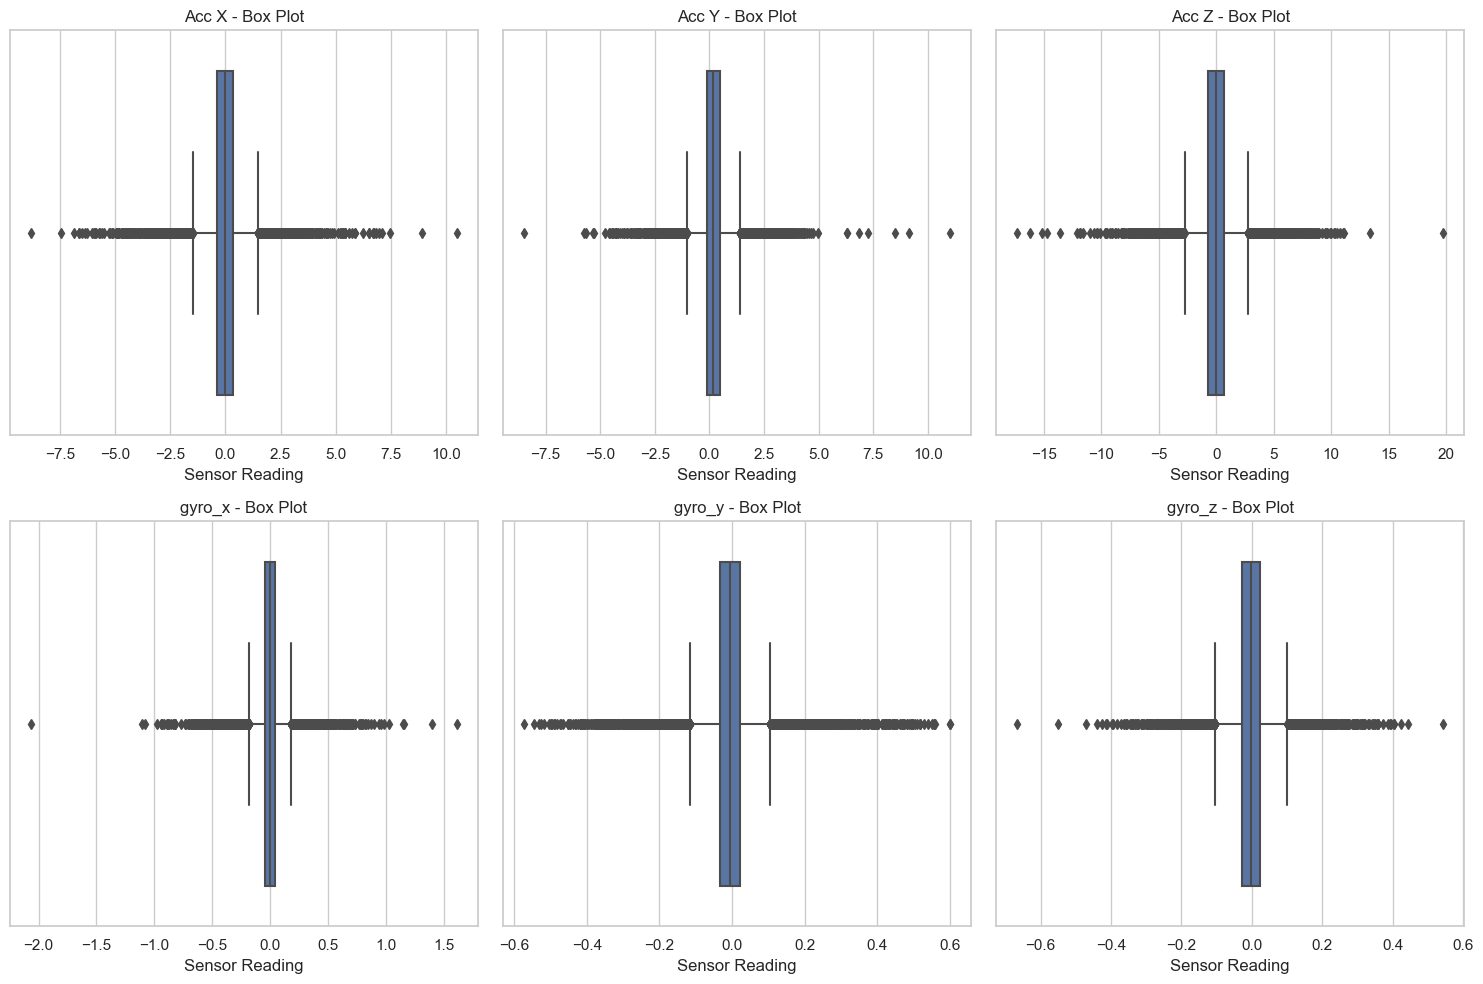

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot a box plot for each sensor column
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid for 6 sensors
    sns.boxplot(x=data[col])
    plt.title(f"{col} - Box Plot")
    plt.xlabel("Sensor Reading")
    
plt.tight_layout()
plt.show()


# Analysis of Outliers

In [8]:
# Calculate and print the percentage of outliers for each sensor
outlier_summary = {col: (outliers[col].sum() / len(outliers) * 100) for col in sensor_columns}

# Display the percentage of outliers for each sensor
for col, percentage in outlier_summary.items():
    print(f"{col}: {percentage:.2f}% of readings are outliers.")


Acc X: 11.71% of readings are outliers.
Acc Y: 11.46% of readings are outliers.
Acc Z: 9.36% of readings are outliers.
gyro_x: 12.66% of readings are outliers.
gyro_y: 12.79% of readings are outliers.
gyro_z: 10.40% of readings are outliers.
